# 1章とK_fold法が少し

In [1]:
# auto reload
%load_ext autoreload
%autoreload 2

In [2]:
# pnadas display settings
import pandas as pd
pd.set_option('display.max_rows', None) # show all rows
import warnings
warnings.filterwarnings('ignore') # 全ての警告を非表示

# 練習問題1
pair plot

In [3]:
# from iris import AnalyzeIris
# 別ファイルでAnalyzeIrisを定義する

In [4]:
# from iris import AnalyzeIris # cannot import name 'AnalyzeIris' from 'iris' (/opt/anaconda3/envs/kadai/lib/python3.11/site-packages/iris/__init__.py)
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names) # pd.DataFrame(data, columns)
iris_df["label"] = iris_dataset.target # add label colum


In [5]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
iris_df.info() # 欠陥なし

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys())) # key and value check

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
print(iris_dataset["DESCR"][:193]+"\n..") # DESCR=description

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
..


In [9]:
print("Target names:{}".format(iris_dataset["target_names"])) # 予測する花の名前

Target names:['setosa' 'versicolor' 'virginica']


In [10]:
print("Feature names:{}".format(iris_dataset["feature_names"]))# 特徴量　sepal=ガク petal=花弁

Feature names:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
type(iris_dataset["data"])

numpy.ndarray

In [12]:
iris_dataset["data"].shape # 150の花と4つの特徴量

(150, 4)

In [13]:
iris_dataset["data"][:10] # sepal length, sepal width, petal length, petal widthの4つの特徴量

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [14]:
type(iris_dataset["target"])

numpy.ndarray

In [15]:
iris_dataset["target"][:100] # ラベル

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
(iris_df.drop("label", axis=1)).corr() # labelを除去して相関関係を得る

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [17]:
import seaborn as sns

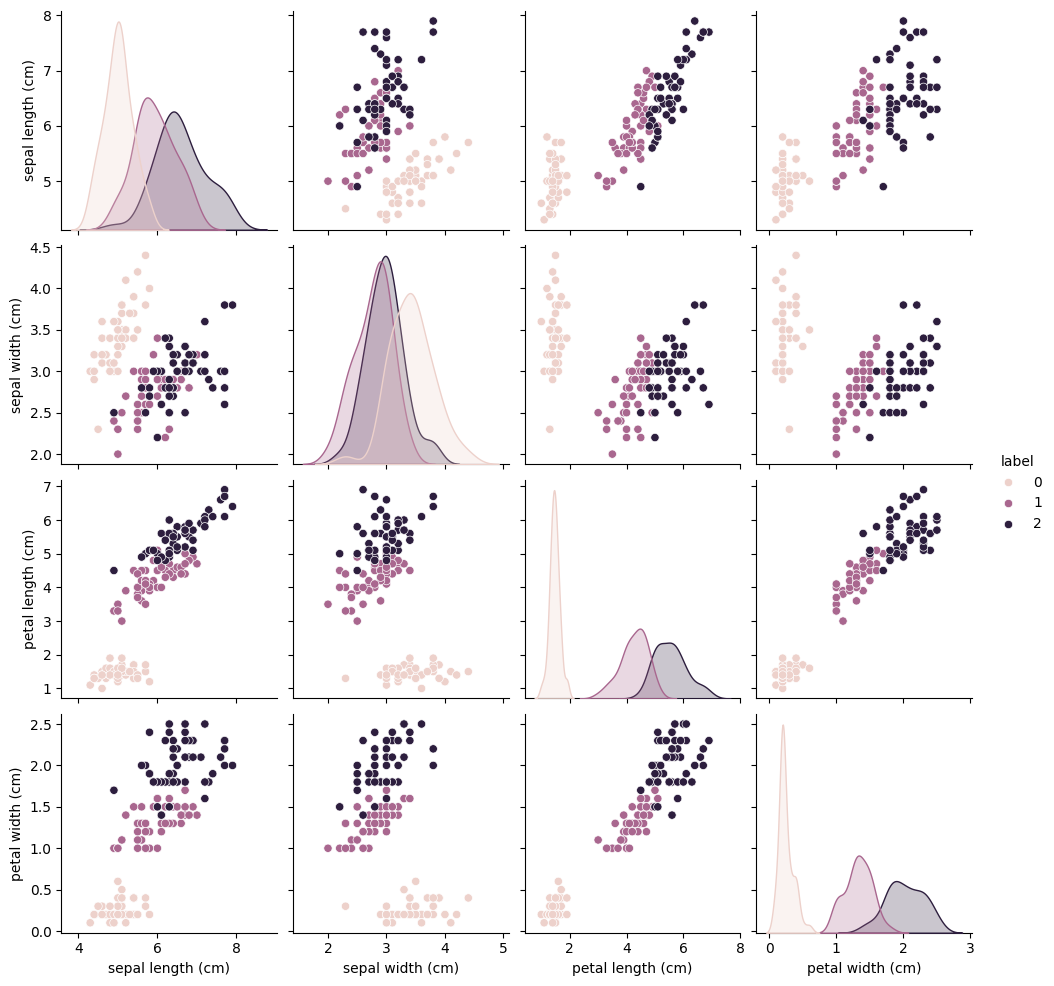

In [18]:
sns.pairplot(iris_df, hue="label") # なんで変な色になる？

In [19]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
iris_df["label"][iris_df["label"]==0] = "setosa"
iris_df["label"][iris_df["label"]==1] = "sersicolor"
iris_df["label"][iris_df["label"]==2] = "virginia"

In [21]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


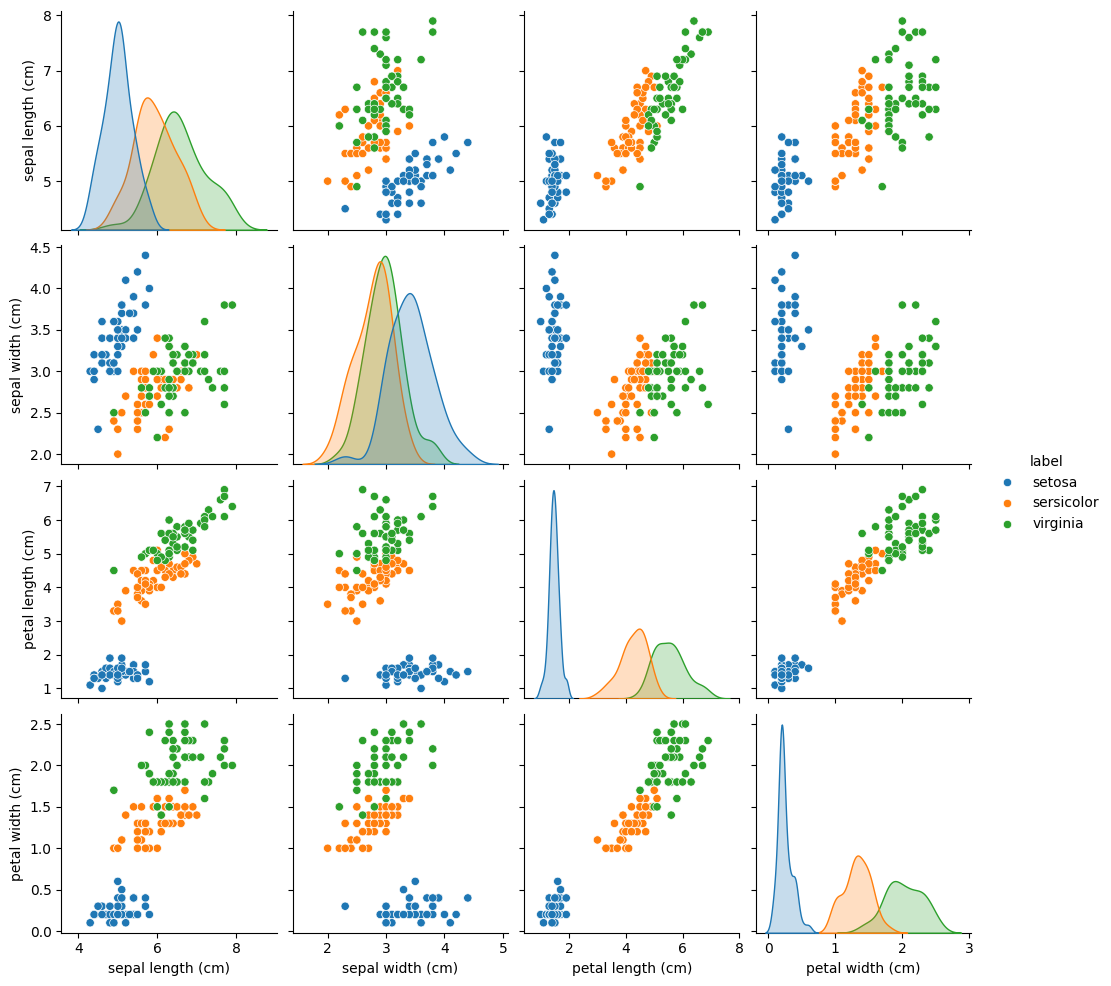

In [22]:
sns.pairplot(iris_df, hue="label") # diag_kind="kde"としなくてもデフォルトでカーネル密度推定がされるみたい

petal widthとpetal lengthの重なりが少ない
→この2つで機械学習をするとうまくいきそう

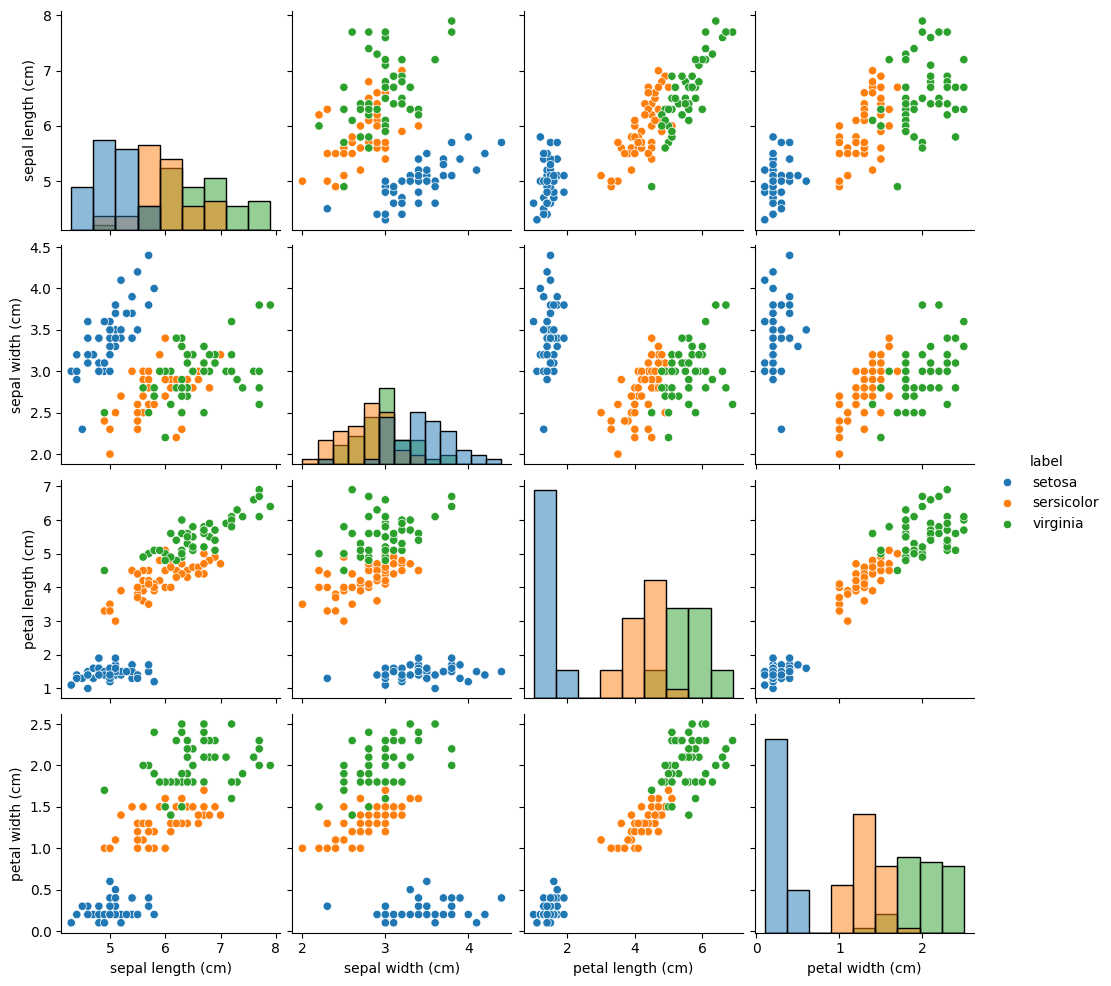

In [23]:
sns.pairplot(iris_df, hue="label", diag_kind='hist') # 明示的にヒストグラムにする

# 練習問題2
k_fold法

In [24]:
from sklearn.datasets import make_blobs # 特定数のクラスタを生成
from sklearn.linear_model import LogisticRegression # ロジスティック回帰モデルを提供
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0) # 2次元のデータを生成, X=特徴量, y=ラベル
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train) # ロジスティック回帰モデルを学習
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test))) # テストデータの精度


Test set score: 0.88


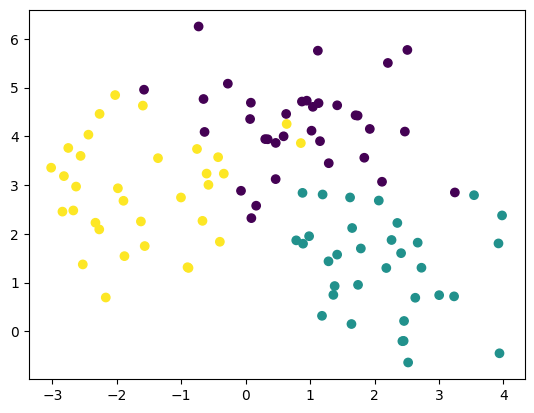

In [25]:
# 二次元データを確認
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y) # 散布図をプロット
plt.show()

## k分割交差検証
- データを例えば5個に分割
- 順番にテストデータを割り振る

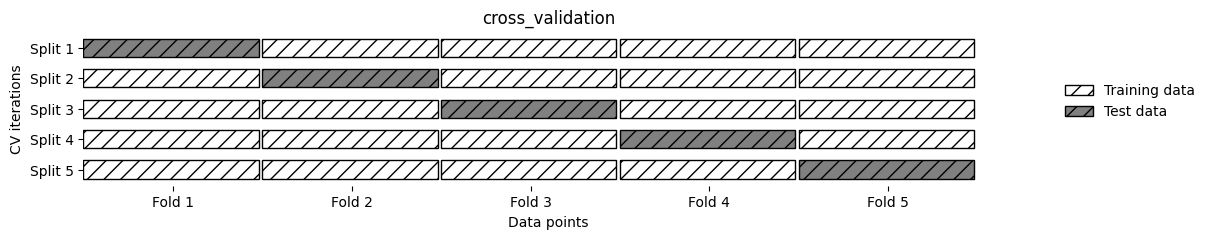

In [26]:
import mglearn
mglearn.plots.plot_cross_validation() # 交差検証の概念図を表示

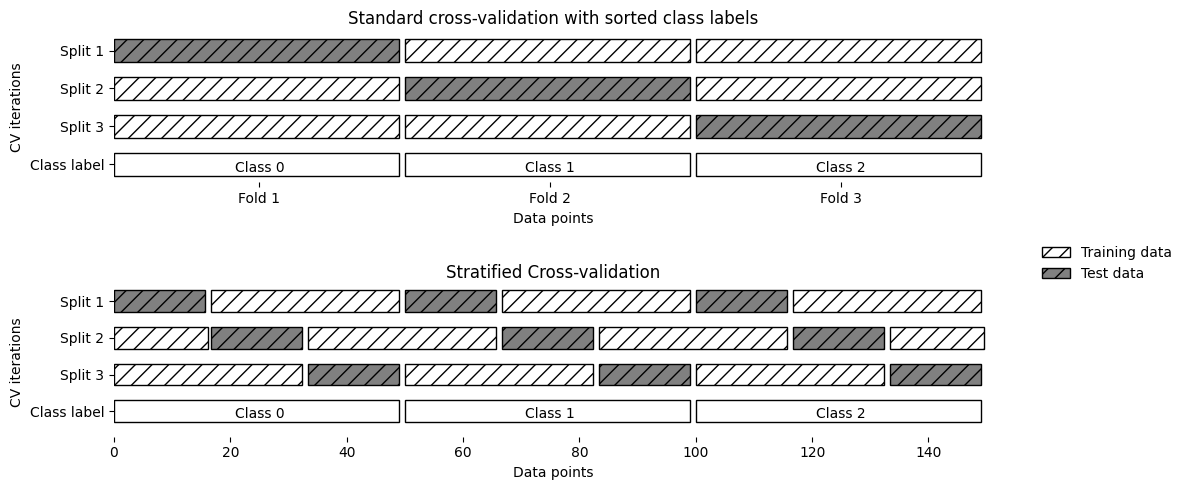

In [32]:
mglearn.plots.plot_stratified_cross_validation() # 層化k分割交差検証の概念図を表示

In [27]:
from sklearn.model_selection import cross_val_score # 交差検証を行う関数
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000) # ロジスティック回帰モデルを生成

scores = cross_val_score(logreg, iris.data, iris.target, cv=5) # 交差検証を行う,引数はモデル, 特徴量, ラベル, 分割数
print("Cross-validation scores: {}".format(scores)) # 5つのスコア

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [28]:
iris.keys() # keyの確認

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [29]:
print(iris["data"][0:5]) # 特徴量の確認
print(iris["target"][0:5]) # ラベルの確認

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


### ロジスティック回帰

In [30]:
# k分割交差検証
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target
kf = KFold(n_splits=5, shuffle=True, random_state=42) # 5分割交差検証用にデータセットを5個に分割(5つのフォールドに分割)
logreg = LogisticRegression(max_iter=1000) # ロジスティック回帰モデル

print("=== LogisticRegression ===")

train_scores = []
test_scores = []

for train_index, test_index in kf.split(X): # kf.split(X)で各フォールドのインデックスを取得
    X_train, X_test = X[train_index], X[test_index] # フォールドのインデックスを使ってデータを分割
    y_train, y_test = y[train_index], y[test_index] # フォールドのインデックスを使ってラベルを分割
    logreg.fit(X_train, y_train) # ロジスティック回帰モデルを学習
    
    train_score = logreg.score(X_train, y_train) # 学習データのスコアを取得
    test_score = logreg.score(X_test, y_test) # テストデータのスコアを取得
    
    train_scores.append(train_score) # 学習データのスコアを取得
    test_scores.append(test_score) # テストデータのスコアを取得
    
    print("test score: {:.3f}, train_score: {:.3f}".format(train_score, test_score)) # テストデータのスコアを表示

=== LogisticRegression ===
test score: 0.975, train_score: 1.000
test score: 0.958, train_score: 1.000
test score: 0.983, train_score: 0.933
test score: 0.975, train_score: 0.967
test score: 0.983, train_score: 0.967


### 目標　iris.all_supervised(n_neighbors=4)
- k近傍法をやる
- K_fold法の実装
- 各分類器の理解

In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"], iris_dataset["target"], random_state=0)

In [42]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [48]:
iris_dataset["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # インスタンス生成

In [51]:
knn.fit(X_train, y_train) # 学習

KNeighborsClassifier(n_neighbors=1)

In [52]:
X_new = np.array([[5, 2.9, 1, 0.2]]) # ガクの長さ, ガクの幅, 花弁の長さ, 花弁の幅
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [57]:
predection = knn.predict(X_new) # 予測
print("Prediction: {}".format(predection))
print(iris_dataset["target_names"][predection])

Prediction: [0]
['setosa']


In [60]:
# model evaluation
y_pred = knn.predict(X_test) # テストデータの予測
print("Test set predictions: \n{}".format(y_pred))
print("Real labels: \n{}".format(y_test))
print("Test set score: {:.2f}".format(np.mean(y_pred ==y_test))) # テストデータの精度

Test set predictions: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Real labels: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
Test set score: 0.97


In [64]:
print("{:.2f}".format(knn.score(X_test, y_test))) # テストデータの精度

0.97


#### ここまでで第一章が終了